<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Акопян Изабелла Арменовна
##### Группа:   НБИбд-01-20

## Москва 2023
***

### Вариант №12

#### __Текст задания__:
В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества  R2  двух подходов.

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду.

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака).

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:

линейной регрессии
гребневой регрессии (L2)
лассо регрессии (L1)
7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.


------------------------
Лабораторная работа 1 – Вариант 12 

1. Набор данных: wine_quality 

2. Независимая переменная: features/density 

3. Зависимая переменная: features/fixed acidity 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

Решение ниже


__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные.__

In [1]:
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load("wine_quality", split='train') 
ds

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteENNBKF/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

In [7]:
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [11]:
#df.drop(columns=['quality'],inplace=True) #оценка качества может быть от 0 до 10 всего
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34


__Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.__

In [16]:
corr_matrix = df.corr()
corr_matrix

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
features/alcohol,1.000000,-0.360189,-0.075729,-0.780138,-0.120881,-0.250104,0.121432,-0.450631,-0.017433,-0.448892,0.067718
features/chlorides,-0.360189,1.000000,0.114364,0.257211,0.023086,0.101392,-0.090439,0.088685,0.016763,0.198910,0.070512
features/citric acid,-0.075729,0.114364,1.000000,0.149503,0.289181,0.094077,-0.163748,0.094212,0.062331,0.121131,-0.149472
features/density,-0.780138,0.257211,0.149503,1.000000,0.265331,0.294210,-0.093592,0.838967,0.074493,0.529881,0.027114
features/fixed acidity,-0.120881,0.023086,0.289181,0.265331,1.000000,-0.049396,-0.425858,0.089021,-0.017143,0.091070,-0.022697
features/free sulfur dioxide,-0.250104,0.101392,0.094077,0.294210,-0.049396,1.000000,-0.000618,0.299098,0.059217,0.615501,-0.097012
features/pH,0.121432,-0.090439,-0.163748,-0.093592,-0.425858,-0.000618,1.000000,-0.194133,0.155951,0.002321,-0.031915
features/residual sugar,-0.450631,0.088685,0.094212,0.838967,0.089021,0.299098,-0.194133,1.000000,-0.026664,0.401439,0.064286
features/sulphates,-0.017433,0.016763,0.062331,0.074493,-0.017143,0.059217,0.155951,-0.026664,1.000000,0.134562,-0.035728
features/total sulfur dioxide,-0.448892,0.198910,0.121131,0.529881,0.091070,0.615501,0.002321,0.401439,0.134562,1.000000,0.089261


In [14]:
import seaborn as sns

<Axes: >

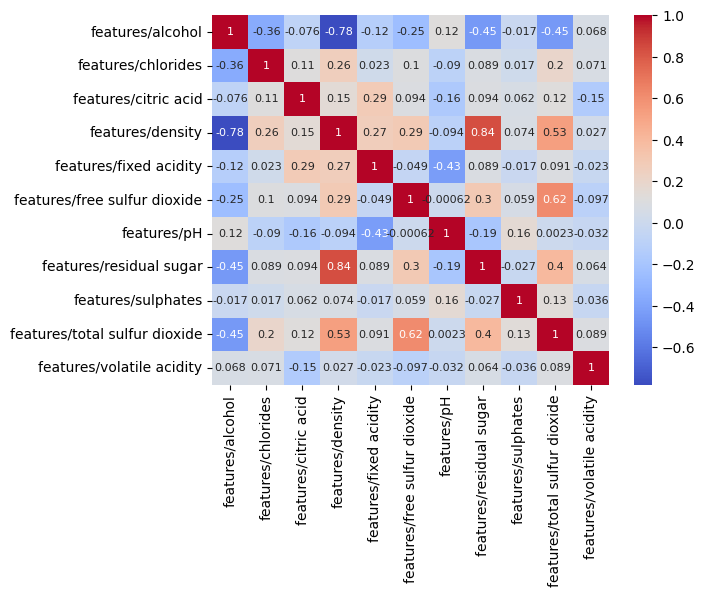

In [26]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size':8}) #для визуализации, так проще
#видим, тут плотность зависит от спирта (чем больше спирта, тем меньше плотность (-0.78)) - по чеддоку корреляция высокая
#а диоксид серы (sulfur acidity) можно считать не зависит от меры кислотности (pH) - по Чеддоку вообще нет корреляции

__Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.__

In [27]:
import matplotlib.pyplot as plt

y = features/fixed acidity 

x = features/density 
Визуализация для независимой переменной – эмпирическая плотность распределения 

Визуализация для зависимой переменной – столбчатая диаграмма 

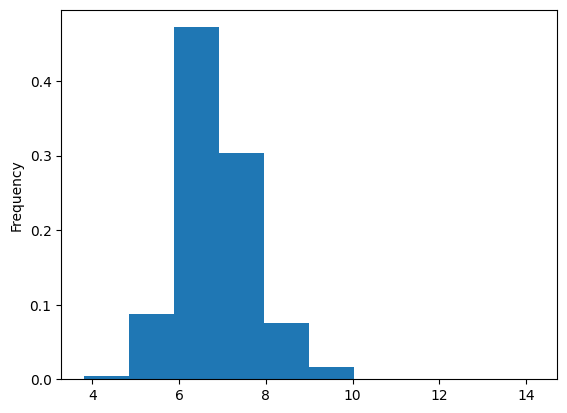

In [28]:
df['features/fixed acidity'].plot.hist(density=True);

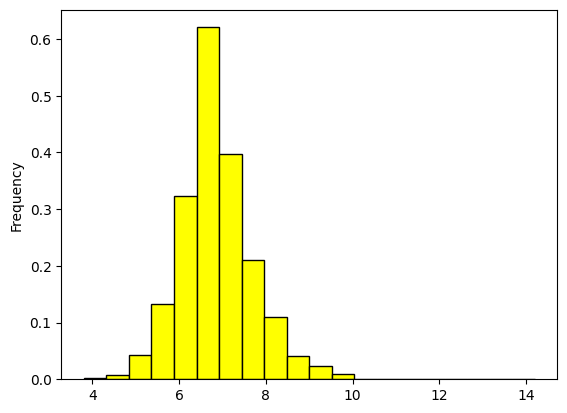

In [30]:
df['features/fixed acidity'].plot.hist(color='yellow', edgecolor='black', bins=20, density=True);